## **Introduction**


Analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups.
We will use the data to run a one-way ANOVA and a post hoc ANOVA test.

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv('/kaggle/input/marketing-promotion/marketing_sales_data.csv')

# Display the first five rows.
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Radio promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)
* Sales (in millions of dollars)

In [3]:
data.shape

(572, 5)

## **Step 2: Data exploration** 


We'll use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

<Axes: xlabel='TV', ylabel='Sales'>

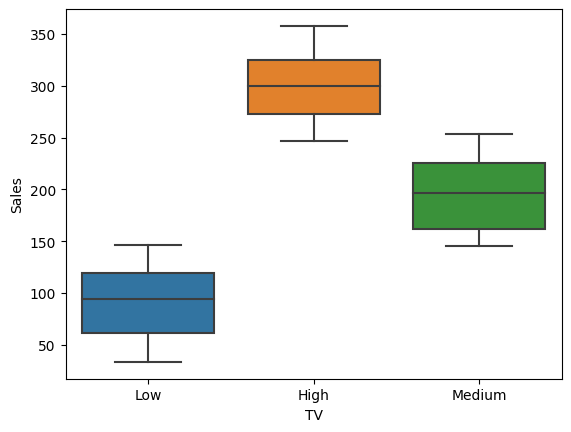

In [4]:
# Create a boxplot with TV and Sales.

sns.boxplot(x='TV', y="Sales", data = data)

There is considerable variation in Sales across the TV groups. The significance of these differences can be tested with a one-way ANOVA.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

<Axes: xlabel='Influencer', ylabel='Sales'>

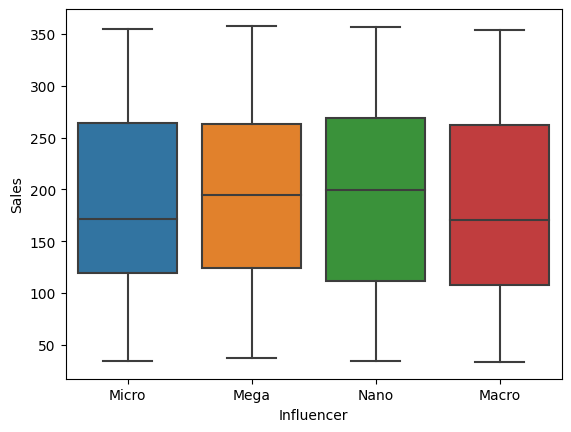

In [5]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x="Influencer", y="Sales",  data = data)

here is some variation in Sales across the Influencer groups, but it may not be significant.

### Remove missing data

In [6]:
# Drop rows that contain missing data and update the DataFrame.

data.shape
data = data.dropna(axis=0)
data.shape

# Confirm the data contains no missing values.

data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`.

In [7]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'


# Create an OLS model.
OLS = ols(formula=ols_formula, data=data )



# Fit the model.
model= OLS.fit()


# Save the results summary.
results = model.summary()

# Display the model results.
print(results)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          1.38e-253
Time:                        09:31:04   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    1

I will choose TV as it seemeed to have a relevant impact on sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

1. Linearity assumption met?

Becuase, my model does not have any contd./discrete independent variable, thus, no need to check for linearity.

2. Independent Observations 

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

3.  Next, verify that the normality assumption is upheld for the model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


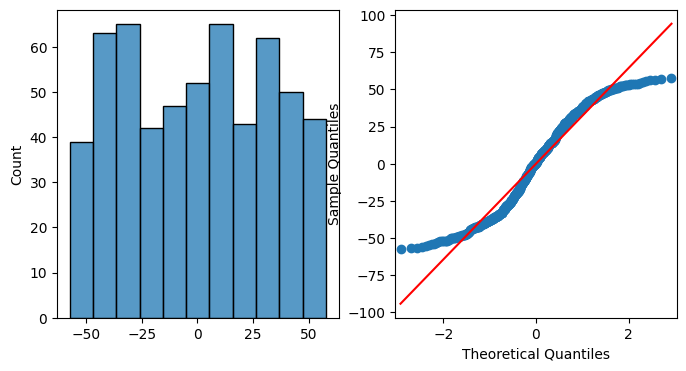

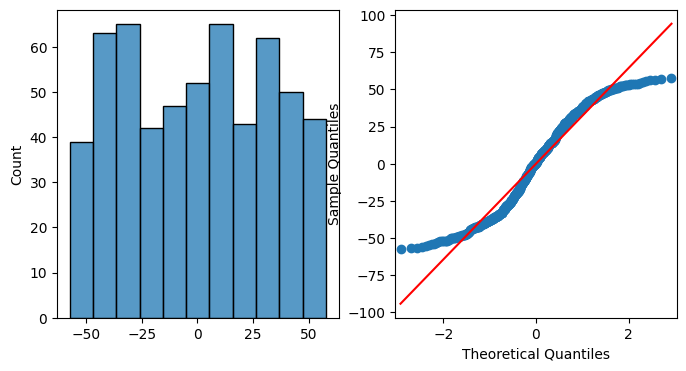

In [8]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1,2,figsize=(8,4))

# Create a histogram with the residuals. 
sns.histplot( residuals, ax = axes[0])


# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s', ax=axes[1])



[Write your response here. Double-click (or enter) to edit.]
Is the normality assumption met?

Residuals are not meeting the normal distribution.
The qq plot is also deviating from the red line, which is not a desired bahaviour.
We'll still continue just to check what results are we getting.

4.  Now, verify the constant variance (homoscedasticity) assumption is met for this model.

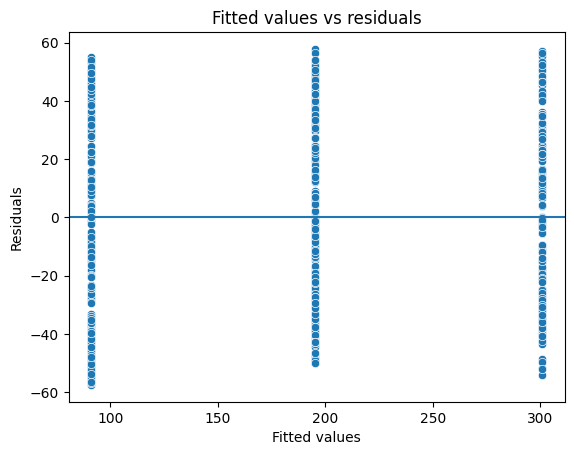

In [9]:
# Create a scatter plot with the fitted values from the model and the residuals.

fitted_Values = model.fittedvalues

fig = sns.scatterplot(x=fitted_Values, y=residuals)
fig.set_title("Fitted values vs residuals")
fig.set_xlabel("Fitted values")
fig.set_ylabel("Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

plt.show()


**Question:** Is the constant variance (homoscedasticity) assumption met?
Yes, homoscedasticity is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [10]:
# Display the model results summary.

print(results)



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          1.38e-253
Time:                        09:31:04   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    1

### Perform a one-way ANOVA test

Now with the fit model, we'll run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [11]:
# Create an one-way ANOVA table for the fit model.


sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.016116e+06,2.0,1917.749265,1.383230e-253
Residual,5.957948e+05,569.0,NaN,NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

H0 : The mean of the sales across all groups of TV budget (Low, medium, high) is same.

H1: The mean of the sales across all groups of TV budget(Low, medium, high) is different.

**Question:** What is conclusion from the one-way ANOVA test?

coz p-value is < 0.05, hence, our results are statistically significant and we can reject H0.

**Question:** What did the ANOVA test tell?

That the groups of TV category variable, do impact the sales. and mean of sales with Low, medium and high budget of promotions on TV are not equal. They are different.

### Perform an ANOVA post hoc test

Once, we have significant results from the one-way ANOVA test, we can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Tukey’s HSD post hoc test is to compare if there is a significant difference between each pair of categories for TV.

Now, with ANOVA, as we reject Ho, we know that means are not same. 
But which means are not same, which are different, that we will know with post-hoc test.

In [12]:
# Perform the Tukey's HSD post hoc test.

tukeyhsd_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups=data["TV"])

tukeyhsd_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


**Question:** What is the interpretation of the Tukey HSD test?

High vs Low: Reject the null hypothesis( i.e. the mean of sales of high TV budget and Low TV budget is same). No, they are not same, they are different.

Same goes with High to Medium ,and
Low to Medium

**Question:** What did the post hoc tell ?

The post hoc test was conducted to determine which TV groups are differnt and how many are different. 

It provides more zoom in details than ANOVA results, which can atmost tell if atleast one group mean is different.

If we run too many tests , we can increase the chance of making the mistake of saying that mean of *these two groups is different*, but in actuality, *they are not*.... Type1 error....

Thus, tukey controls this problem. Tukey calculates, HSD critical value and on basis of this, annoounces which two groups have different means .